In [1]:
import numpy as np
import torch
import sys
sys.path.append('/Users/mehdi/github/sysnetdev')
from sysnet.sources.models import DNN
from sysnet.sources.io import load_checkpoint

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
# load model
model = DNN(*(4, 20, 18, 1))
_=load_checkpoint('../output/mock001_cp2p_l1_1pm1/model_0_2664485226/best.pth.tar', model)

In [42]:
model

DNN(
  (fc): ModuleList(
    (0): Linear(in_features=18, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
  (bn): ModuleList(
    (0): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [43]:
fc0_weight = model.fc[0].weight.data.numpy()

(array([70., 48., 56., 44., 45., 33., 28., 27.,  5.,  4.]),
 array([0.00199594, 0.03747186, 0.07294778, 0.10842369, 0.1438996 ,
        0.17937553, 0.21485144, 0.25032735, 0.2858033 , 0.3212792 ,
        0.3567551 ], dtype=float32),
 <a list of 10 Patch objects>)

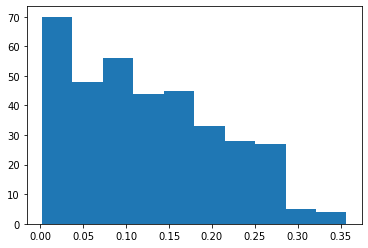

In [44]:
plt.hist(abs(fc0_weight).flatten())

In [46]:
xlabels = ['EBV', 'lnHI', 'nstar']\
        + ['-'.join([s, b]) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd'] for b in 'rgz']

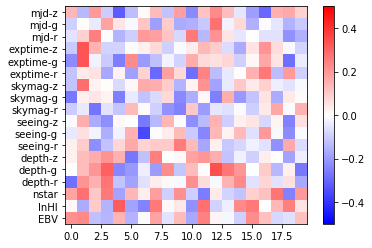

In [47]:
plt.imshow(fc0_weight.T, origin='lower', cmap=plt.cm.bwr, vmin=-.5, vmax=.5)#, vmin=-0.3, vmax=0.3)
plt.colorbar()
plt.yticks(np.arange(18), labels=xlabels)
plt.show()

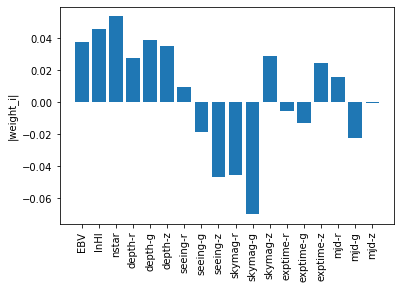

In [37]:
plt.bar(np.arange(18), fc0_weight.mean(axis=0))
plt.ylabel('|weight_i|')
_=plt.xticks(np.arange(18), labels=xlabels, rotation=90)

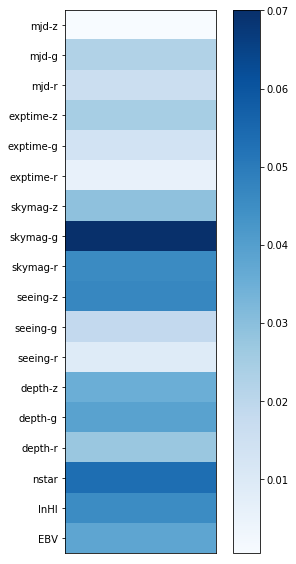

In [48]:
plt.figure(figsize=(6, 10))
plt.imshow(abs(fc0_weight.mean(axis=0)[:, np.newaxis]), 
           cmap=plt.cm.Blues, extent=(0, 5, -0.5, 17.5), origin='lower')
plt.yticks(np.arange(18), labels=xlabels)
plt.xticks([])
plt.colorbar()

## correlation 

In [20]:
df = np.load('../input/001/cp2p/cp2p_001.hp.256.5.r.npy', allow_pickle=True).item()

In [21]:
df.keys()

dict_keys(['test', 'train', 'validation'])

In [22]:
dt = np.concatenate([df['test']['fold%d'%i] for i in range(5)])

In [23]:
dt

array([(0.53752334, 164046, [1.81269739e-02, 4.64452051e+01, 9.53182495e+02, 2.32829876e+01, 2.36321564e+01, 2.22366638e+01, 1.65602851e+00, 2.06096888e+00, 1.46481442e+00, 2.38607674e+01, 2.52443409e+01, 2.16411324e+01, 1.47692307e+02, 2.07923080e+02, 1.81384613e+02, 5.71093711e+04, 5.71093711e+04, 5.71093672e+04], 1.05231352),
       (0.11811819, 164974, [1.06161097e-02, 4.60299349e+01, 4.19400299e+02, 2.32656784e+01, 2.35504894e+01, 2.24146347e+01, 1.58421600e+00, 1.98907864e+00, 1.51539063e+00, 2.33363934e+01, 2.46431160e+01, 2.17498646e+01, 1.51166672e+02, 2.11833328e+02, 2.13333328e+02, 5.71292461e+04, 5.71292461e+04, 5.71292422e+04], 1.19719727),
       (0.90147143, 165070, [1.79187600e-02, 4.64456763e+01, 1.12475537e+03, 2.34990387e+01, 2.38696079e+01, 2.24596119e+01, 1.57656622e+00, 1.91230607e+00, 1.40638876e+00, 2.38358555e+01, 2.52123795e+01, 2.11286602e+01, 2.08000000e+02, 2.93799988e+02, 2.61533325e+02, 5.71093711e+04, 5.71093711e+04, 5.71093672e+04], 1.09806628),
       

In [24]:
from scipy.stats import pearsonr